In [1]:
# %pip install numpy pandas openpyxl networkx

Helper function to combine transfer classes into passing classes.

In [2]:
#Merge trans columns into pass columns
def merge_trans_classes(df):
    pass_classes = [col for col in df.columns if "Pass" in col]
    trans_classes = [col for col in df.columns if "Tran" in col]

    #Combine the trans into the pass
    for t in trans_classes:
        class_name = t.split("_")[0]
        for p in pass_classes:
            if class_name in p:
                df[p] = df[p].combine_first(df[t])

    #Drop the trans cols
    for t in trans_classes:
        df = df.drop(t,axis=1)
    
    return df

Create an array of every CS class a student can take in a given semester

In [3]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('CS Course Enrollment Data 030824.xlsx')
df = merge_trans_classes(df)

# Drop the last column.
df = df.drop(df.columns[-1],axis=1)

# Get all the "Pass" semester columns.
semester_cols = [col for col in df.columns if 'Pass' in col]

classes = np.array([])

for col in semester_cols:
    classes = np.append(classes, [str(col).split("_")[0]])

print("Classes: ")
print(np.array_str(classes))

Classes: 
['CSCI101' 'CSCI128' 'CSCI200' 'CSCI210' 'CSCI220' 'CSCI261' 'CSCI262'
 'CSCI274' 'CSCI306' 'CSCI341' 'CSCI358' 'CSCI370' 'CSCI400' 'CSCI406'
 'CSCI442' 'MATH111' 'MATH112' 'MATH113' 'MATH122' 'MATH213' 'MATH214'
 'MATH223' 'MATH224' 'MATH225' 'MATH235' 'MATH300' 'MATH307' 'MATH332'
 'MATH342' 'PHGN100' 'PHGN200' 'CSCI404' 'CSCI410' 'CSCI422' 'CSCI423'
 'CSCI425' 'CSCI432' 'CSCI436' 'CSCI437' 'CSCI440' 'CSCI441' 'CSCI443'
 'CSCI444' 'CSCI445' 'CSCI446' 'CSCI448' 'CSCI455' 'CSCI470' 'CSCI471'
 'CSCI473' 'CSCI474' 'CSCI475' 'CSCI477' 'CSCI478']


Create directed graph representing the CS flowchart. For the purposes of reading this data into the stochastic matrix, we will want to include cumulative prereqs, so while 403 doesn't require 101 directly, we will still list it as a requirement.

In [4]:
import networkx as nx 

requirements = nx.DiGraph()

requirements.add_nodes_from(classes)

# Explicit Prerequisites
# Taken from here: https://catalog.mines.edu/undergraduate/programs/cs/#coursestext
# For completenes, I included edges to/from classes we aren't tracking
# Also note that some prereqs rquire you to earn a certain grade in another class (usually a C-), to pass the class, here I treat all prereqs as the same
requirements.add_edge('CSCI101', 'CSCI200')
requirements.add_edge('CSCI128', 'CSCI200')

requirements.add_edge('CSCI200', 'CSCI210')

requirements.add_edge('CSCI200', 'CSCI220')

requirements.add_edge('CSCI128', 'CSCI250')

requirements.add_edge('CSCI101', 'CSCI261')

requirements.add_edge('CSCI261', 'CSCI262')

requirements.add_edge('CSCI200', 'CSCI274')
requirements.add_edge('CSCI261', 'CSCI274')

requirements.add_edge('CSCI220', 'CSCI290')
requirements.add_edge('CSCI262', 'CSCI290')

# For some reason CSCI 303, Introduction to Data Science, lists all of these classes under an "X or Y or Z"-style prerequisite, which I think is odd
requirements.add_edge('CSCI101', 'CSCI303')
requirements.add_edge('CSCI102', 'CSCI303')
requirements.add_edge('CSCI128', 'CSCI303')
requirements.add_edge('CSCI200', 'CSCI303')
requirements.add_edge('CSCI261', 'CSCI303')

requirements.add_edge('CSCI210', 'CSCI306')
requirements.add_edge('CSCI220', 'CSCI306')
requirements.add_edge('CSCI262', 'CSCI306')

# CSCI341 prereqs are listed as: "Prerequisite: CSCI200 or CSCI261, CSCI262.", the phrasing seems odd to me
requirements.add_edge('CSCI200', 'CSCI341')
requirements.add_edge('CSCI261', 'CSCI341')
requirements.add_edge('CSCI262', 'CSCI341')

# 358 requires MATH112 or MATH113 or MATH122
requirements.add_edge('MATH112', 'CSCI358')
requirements.add_edge('MATH113', 'CSCI358')
requirements.add_edge('MATH122', 'CSCI358')

requirements.add_edge('CSCI306', 'CSCI370')

requirements.add_edge('CSCI290', 'CSCI390')

requirements.add_edge('CSCI306', 'CSCI400')
requirements.add_edge('CSCI358', 'CSCI400')

requirements.add_edge('CSCI200', 'CSCI403')
requirements.add_edge('CSCI262', 'CSCI403')

# AI requires Intro to Stats OR Intro to Probability, I don't think most AI students will have taken Intro to Probability
requirements.add_edge('CSCI220', 'CSCI404')
requirements.add_edge('CSCI262', 'CSCI404')
requirements.add_edge('MATH201', 'CSCI404')
requirements.add_edge('MATH334', 'CSCI404')

# "MATH358" is listen on the official course catalog, but the link is broken, I don't think that class exists anymore
requirements.add_edge('CSCI220', 'CSCI406')
requirements.add_edge('CSCI262', 'CSCI406')
requirements.add_edge('MATH213', 'CSCI406')
requirements.add_edge('MATH223', 'CSCI406')
requirements.add_edge('MATH224', 'CSCI406')
requirements.add_edge('MATH300', 'CSCI406')
requirements.add_edge('MATH358', 'CSCI406')
requirements.add_edge('CSCI358', 'CSCI406')

requirements.add_edge('CSCI341', 'CSCI410')
requirements.add_edge('EENG383', 'CSCI410')

requirements.add_edge('CSCI262', 'CSCI422')

# Prequisites for Computer Simulation are especially odd: (CSCI210 or CSCI274) AND CSCI306 AND (MATH201 or MATH334).
requirements.add_edge('CSCI210', 'CSCI423')
requirements.add_edge('CSCI274', 'CSCI423')
requirements.add_edge('CSCI306', 'CSCI423')
requirements.add_edge('MATH201', 'CSCI423')
requirements.add_edge('MATH334', 'CSCI423')

requirements.add_edge('CSCI274', 'CSCI425')
requirements.add_edge('CSCI306', 'CSCI425')
requirements.add_edge('CSCI341', 'CSCI425')

requirements.add_edge('CSCI220', 'CSCI432')
requirements.add_edge('CSCI262', 'CSCI432')
requirements.add_edge('MATH201', 'CSCI432')

# Note that the prereqs for this class require CSCI200 OR CSCI262, despite those not being equivalent courses
requirements.add_edge('CSCI200', 'CSCI436')
requirements.add_edge('CSCI262', 'CSCI436')
requirements.add_edge('MATH201', 'CSCI436')

# The requirements here are listed as: (MATH201 or MATH334 or EENG311),and,MATH332,and,(CSCI200 or CSCI261).
requirements.add_edge('MATH201', 'CSCI437')
requirements.add_edge('MATH334', 'CSCI437')
requirements.add_edge('EENG311', 'CSCI437')
requirements.add_edge('MATH332', 'CSCI437')
requirements.add_edge('CSCI200', 'CSCI437')
requirements.add_edge('CSCI261', 'CSCI437')

requirements.add_edge('CSCI220', 'CSCI440')
requirements.add_edge('CSCI262', 'CSCI440')
requirements.add_edge('CSCI341', 'CSCI440')

requirements.add_edge('CSCI220', 'CSCI441')
requirements.add_edge('CSCI262', 'CSCI441')
requirements.add_edge('MATH332', 'CSCI441')

requirements.add_edge('CSCI220', 'CSCI442')
requirements.add_edge('CSCI262', 'CSCI442')
requirements.add_edge('CSCI274', 'CSCI442')
requirements.add_edge('CSCI341', 'CSCI442')

requirements.add_edge('CSCI306', 'CSCI443')

requirements.add_edge('CSCI441', 'CSCI444')

requirements.add_edge('CSCI306', 'CSCI445')

requirements.add_edge('CSCI220', 'CSCI446')
requirements.add_edge('CSCI262', 'CSCI446')

requirements.add_edge('CSCI306', 'CSCI448')

requirements.add_edge('CSCI358', 'CSCI455')
requirements.add_edge('CSCI406', 'CSCI455')

# Listed as: CSCI101 or CSCI102 or CSCI200 or CSCI261, MATH201, MATH332.
requirements.add_edge('CSCI101', 'CSCI470')
requirements.add_edge('CSCI102', 'CSCI470')
requirements.add_edge('CSCI200', 'CSCI470')
requirements.add_edge('CSCI261', 'CSCI470')
requirements.add_edge('MATH201', 'CSCI470')
requirements.add_edge('MATH332', 'CSCI470')

# Listed as: (CSCI220 or CSCI262) AND (CSCI210 or CSCI274)
requirements.add_edge('CSCI220', 'CSCI471')
requirements.add_edge('CSCI262', 'CSCI471')
requirements.add_edge('CSCI210', 'CSCI471')
requirements.add_edge('CSCI274', 'CSCI471')

# Listed as: (CSCI220 or CSCI262),and,(MATH201 or MATH334)
requirements.add_edge('CSCI220', 'CSCI473')
requirements.add_edge('CSCI262', 'CSCI473')
requirements.add_edge('MATH201', 'CSCI473')
requirements.add_edge('MATH334', 'CSCI473')

# Listed as: CSCI220 or CSCI262, CSCI358, MATH334 or MATH335 or MATH201
requirements.add_edge('CSCI220', 'CSCI474')
requirements.add_edge('CSCI262', 'CSCI474')
requirements.add_edge('CSCI358', 'CSCI474')
requirements.add_edge('MATH334', 'CSCI474')
requirements.add_edge('MATH335', 'CSCI474')
requirements.add_edge('MATH201', 'CSCI474')

requirements.add_edge('CSCI220', 'CSCI475')
requirements.add_edge('CSCI262', 'CSCI475')
requirements.add_edge('CSCI341', 'CSCI475')
requirements.add_edge('CSCI274', 'CSCI475')

requirements.add_edge('CSCI220', 'CSCI477')
requirements.add_edge('CSCI262', 'CSCI477')

# Listed as: CSCI101 or CSCI102 or CSCI128 or CSCI200 or CSCI261
requirements.add_edge('CSCI101', 'CSCI478')
requirements.add_edge('CSCI102', 'CSCI478')
requirements.add_edge('CSCI128', 'CSCI478')
requirements.add_edge('CSCI200', 'CSCI478')
requirements.add_edge('CSCI261', 'CSCI478')

# Note that this is for an honors thesis
requirements.add_edge('CSCI306', 'CSCI480')

requirements.add_edge('CSCI390', 'CSCI490')


# Note that Special Topics are not currently included since we don't know what the prereqs for those classes will be for now
# Once these are available, they can be put here


# Corequisites
requirements.add_edge('MATH213', 'CSCI250')
requirements.add_edge('PHGN200', 'CSCI250')

requirements.add_edge('CSCI358', 'CSCI390')

requirements.add_edge('CSCI403', 'CSCI445')

requirements.add_edge('CSCI403', 'CSCI446')

requirements.add_edge('CSCI406', 'CSCI490')



# Implicit Prerequisites
# For the Markov chain solution, we want to imply that if a student is taking Algorithms that they probably won't take CSCI128 next semester

# # The requirements should be a DAG
# assert(nx.is_directed_acyclic_graph(requirements))

# for node in requirements.nodes:
#     node_descendents = nx.descendants(requirements, node)

#     for other_node in node_descendents:
#         requirements.add_edge(node, other_node)

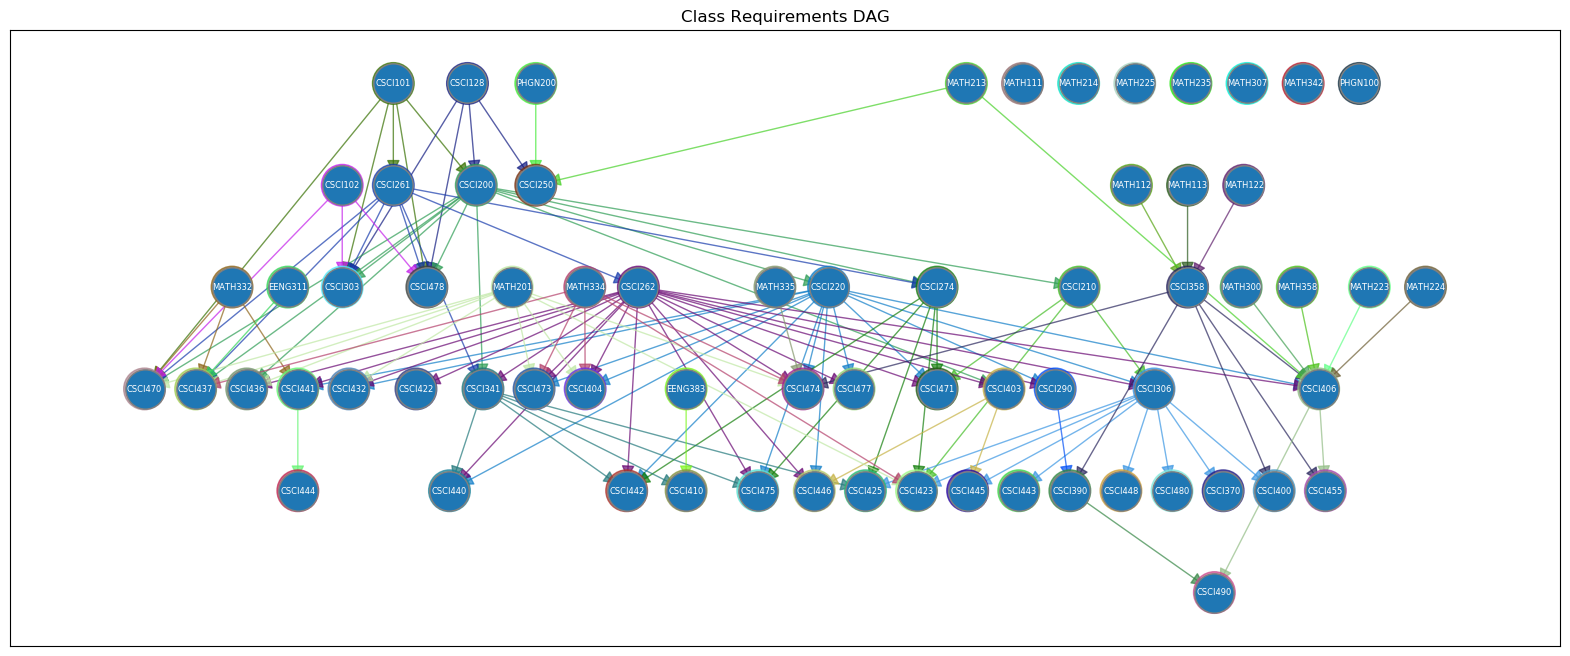

In [69]:
#Don't run unless you have graphiz installed
import matplotlib.pyplot as plt
import random

def generate_random_color():
    return f"#{random.randint(0, 0xCCCCCC):06x}"




def draw_dag(G):   
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot",)
    plt.figure(figsize=(20, 8))

    node_colors = {node: generate_random_color() for node in G.nodes()}
    edge_colors = [node_colors[edge[0]] for edge in G.edges()]
 
 
    options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 1}
    edges = nx.draw_networkx_edges(G, pos,width=1.0, alpha=0.7,arrows=True, arrowsize=20,edge_color=edge_colors)
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()],  alpha=0.7, node_size=900)
    nx.draw_networkx_nodes(G, pos, node_color = "tab:blue", **options)
    text = nx.draw_networkx_labels(G, pos,font_size= 6,font_color="white")
    # for _, t in text.items():
    #     t.set_rotation(45)
        
    plt.title("Class Requirements DAG")
    plt.show()

draw_dag(requirements)